In [1]:
# Set the process name to be human readable in htop
import setproctitle
setproctitle.setproctitle("Prep_Figure_S1")

import requests
import pandas as pd
pd.options.display.max_columns = 999

import numpy as np
import helper as my

import glob
import os
import sys

from tqdm import tqdm, tqdm_notebook
from tqdm._tqdm_notebook import tqdm_notebook

tqdm.pandas(tqdm_notebook)
tqdm_notebook.pandas()


%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from collections import defaultdict

In [256]:
uni2seq["COVID19nsp2"]

638

{1, 11, 21, 31, 41, 51, 61, 71, 73}

In [3]:
pdb_fs = glob.glob("../../Data/Undocked_Structures/COVID19*")

In [163]:
uni2seq = pd.read_csv("../../Data/Proteins.txt", sep="\t").set_index("ID")["Sequence"].to_dict()

In [166]:
ax.get_xticks()

array([   0.,   50.,  100.,  150.,  200.,  250.])

In [195]:
abs(tick_labels[-2] - tick_labels[-1])

1

In [199]:
len(pdb_fs)

19

../../Data/Undocked_Structures/COVID19Spike.pdb Spike.ali


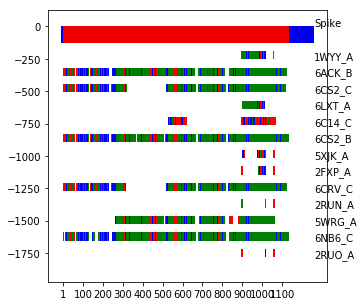

../../Data/Undocked_Structures/COVID19nsp1.pdb nsp1.ali


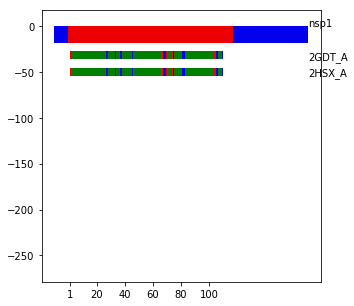

../../Data/Undocked_Structures/COVID19nsp10.pdb nsp10.ali


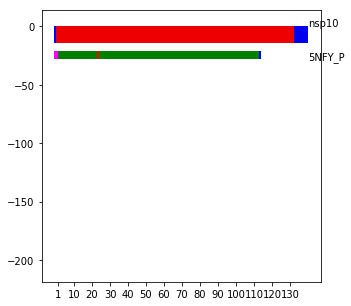

../../Data/Undocked_Structures/COVID19nsp12.pdb nsp12.ali


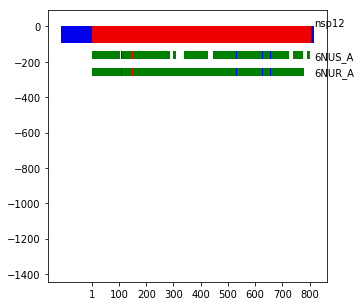

../../Data/Undocked_Structures/COVID19nsp13.pdb nsp13.ali


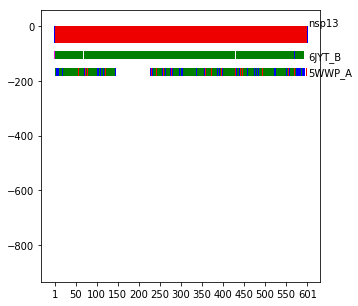

../../Data/Undocked_Structures/COVID19nsp14.pdb nsp14.ali


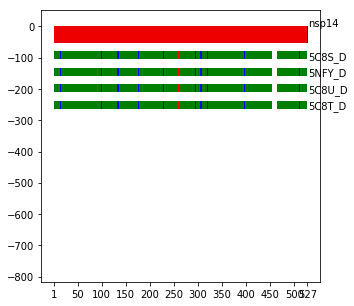

../../Data/Undocked_Structures/COVID19nsp15.pdb nsp15.ali


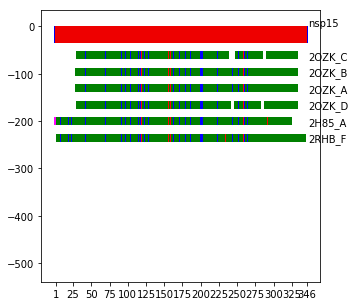

../../Data/Undocked_Structures/COVID19nsp2.pdb nsp2.ali


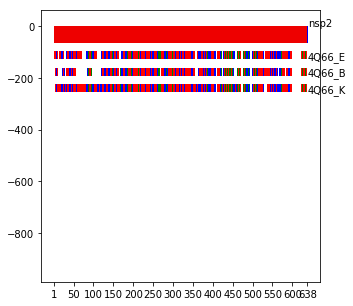

../../Data/Undocked_Structures/COVID19nsp4.pdb nsp4.ali


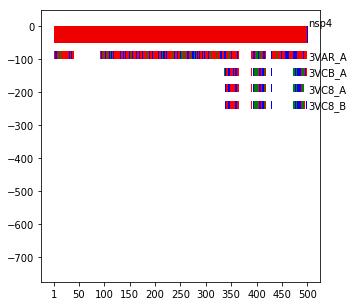

../../Data/Undocked_Structures/COVID19nsp5.pdb nsp5.ali


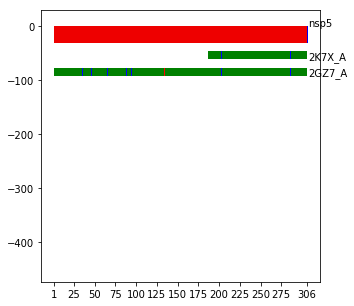

../../Data/Undocked_Structures/COVID19nsp5C145A.pdb nsp5_C145A.ali


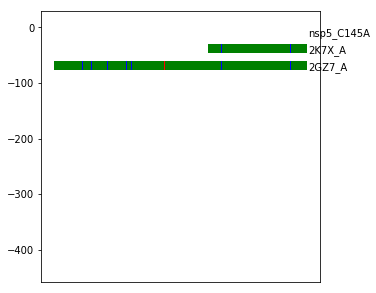

../../Data/Undocked_Structures/COVID19nsp7.pdb nsp7.ali


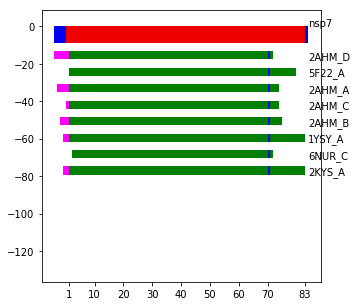

../../Data/Undocked_Structures/COVID19nsp8.pdb nsp8.ali


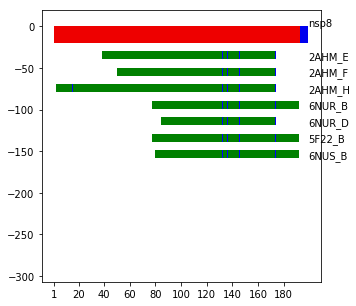

../../Data/Undocked_Structures/COVID19nsp9.pdb nsp9.ali


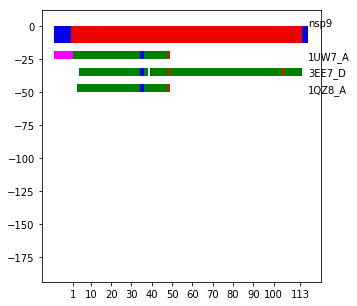

../../Data/Undocked_Structures/COVID19orf6.pdb orf6.ali


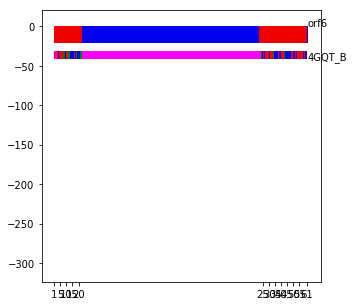

../../Data/Undocked_Structures/COVID19orf7a.pdb orf7a.ali


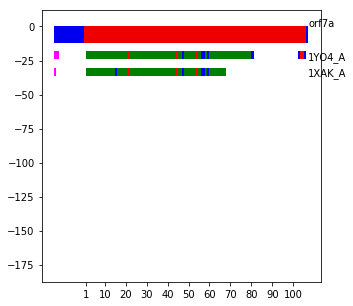

../../Data/Undocked_Structures/COVID19orf8.pdb orf8.ali


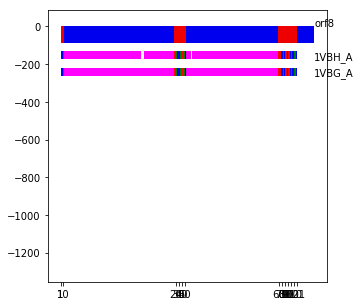

../../Data/Undocked_Structures/COVID19orf9b.pdb orf9b.ali


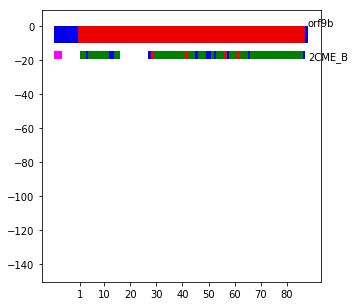

../../Data/Undocked_Structures/COVID19orf9c.pdb orf9c.ali


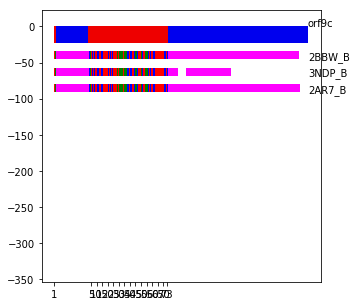

In [203]:
def getBlosumScore(x, y, matrix=my.MatrixInfo.blosum62):
    try:
        return matrix[(x, y)]
    except KeyError:
        return matrix[(y, x)]
# FUNCTION END

for f in sorted(pdb_fs):
    ali = glob.glob(os.path.basename(f).replace("COVID19", "").split(".")[0].replace("C145A", "_C145A") + ".ali")[0]
    
    seq = uni2seq[os.path.basename(f).split(".")[0]]
    print f, ali
    
    lines = my.easyReadLines(ali)
    keys = [x.split(";")[1] for x in lines[::3]]
    values = [x.replace("*", "") for x in lines[2::3]]
    d = dict(zip(keys, values))
    
    #plt.figure(figsize=(5, 5))
    fig,ax = plt.subplots(1, figsize=(5, 5))
    y = 0
    count = 0
    plot_pos = 0
    seq_pos = 1
    plot2seq = dict()
    for k, v in sorted(d.iteritems(), key=lambda x: "_" in x[0]):
        count += 1
        if(not "_" in k):
            stand_height = (len(v) / 100.0)*5
            ref = v
            r = matplotlib.patches.Rectangle((0,y), len(v), -stand_height*2, linewidth=1, edgecolor=None, facecolor='#EE0000')
            ax.add_patch(r)
            
            start = -1
            end = -1
            for i in range(len(v)):
                if(not v[i] == "-" and start != -1):
                    end = i-1
                    r = matplotlib.patches.Rectangle((start,y), end-start, -stand_height*2, linewidth=1, edgecolor=None, facecolor='#0000EE')
                    #print "Draw rect:", start, end
                    ax.add_patch(r)
                    start = -1
                elif(v[i] == "-" and start == -1):
                    start = i
                plot2seq[plot_pos] = seq_pos
                plot_pos += 1
                if(v[i] != "-"):
                    seq_pos += 1
            if(not start == -1):
                end = i+1
                r = matplotlib.patches.Rectangle((start,y), end-start, -stand_height*2, linewidth=1, edgecolor=None, facecolor='#0000EE')
                #print "Draw rect:", start, end
                ax.add_patch(r)
                start = -1
            y -= stand_height*3
            ax.text(len(v), 0, k)
        else:
            boxes = []
            start = -1
            t = None
            for i in range(len(v)):
                t_cur = v[i] == ref[i]
                if(not t_cur):
                    if(v[i] == "-"):
                        t_cur = None
                    elif(ref[i] == "-"):
                        t_cur = "Gap"
                    elif(getBlosumScore(v[i], ref[i]) < 0):
                        t_cur = "Negative"
                    else:
                        t_cur = "Positive"
                if(t == None):
                    if(not v[i] == "-"):
                        #t = v[i] == ref[i]
                        t = t_cur
                        start = i
                #elif((v[i] == ref[i]) != t):
                elif(t_cur != t):
                    boxes.append([start, i, t])
                    if(not v[i] == "-"):
                        start = i
                        #t = v[i] == ref[i]
                        t = t_cur
                    else:
                        start = -1
                        t = None
            for start, end, t in boxes:
                if(t == True):
                    color = "g"
                elif(t == "Negative"):
                    color = "r"
                elif(t == "Positive"):
                    color = "b"
                else:
                    color = "magenta"
                r = matplotlib.patches.Rectangle((start,y), end-start, -stand_height, linewidth=1, edgecolor=None, facecolor=color)
                #print "Draw rect:", start, end
                ax.add_patch(r)
            ax.text(len(ref), y - (stand_height), k)
            y -= stand_height*2
    while(count < 15):
        count += 1
        y -= stand_height*2
        
    ax.set_xlim(0 - 0.05*len(v), len(v) + 0.05*len(v))
    ax.set_ylim(y, 0+stand_height*2)
    
    tick_labels = ax.get_xticks()
    tick_dist = min([5, 10, 20, 25, 50, 100], key=lambda x: abs(x - len(seq) / 10.0))
    tick_labels = sorted(range(0, len(seq), tick_dist) + [len(seq)])
    if(abs(tick_labels[-2] - tick_labels[-1]) <= tick_dist / 2.0):
        tick_labels = [x for x in tick_labels if not x == tick_labels[-2]]
    tick_labels = [x for x in tick_labels if not x == 0]
    
    tick_locations = []
    new_tick_labels = []
    #print tick_labels
    #print plot2seq
    for i in plot2seq:
        if(plot2seq[i] in tick_labels and not plot2seq[i] in new_tick_labels):
            tick_locations.append(i)
            new_tick_labels.append(plot2seq[i])
        if(plot2seq[i] == 2 and not 1 in new_tick_labels):
            tick_locations.append(i-1)
            new_tick_labels.append(1)
    ax.set_xticks(tick_locations)
    ax.set_xticklabels(new_tick_labels)
    
    plt.savefig(os.path.basename(f).split(".")[0] + ".svg")
    plt.show()
    #break
    #if("orf6" in f):
    #    break

In [254]:
sorted([(k, len(uni2seq[k])) for k in uni2seq if "COVID" in k])

[('COVID19E', 75),
 ('COVID19M', 222),
 ('COVID19N', 419),
 ('COVID19Spike', 1273),
 ('COVID19nsp1', 180),
 ('COVID19nsp10', 139),
 ('COVID19nsp11', 13),
 ('COVID19nsp12', 932),
 ('COVID19nsp13', 601),
 ('COVID19nsp14', 527),
 ('COVID19nsp15', 346),
 ('COVID19nsp2', 638),
 ('COVID19nsp4', 500),
 ('COVID19nsp5', 306),
 ('COVID19nsp5C145A', 306),
 ('COVID19nsp6', 290),
 ('COVID19nsp7', 83),
 ('COVID19nsp8', 198),
 ('COVID19nsp9', 113),
 ('COVID19orf10', 38),
 ('COVID19orf3a', 275),
 ('COVID19orf3b', 57),
 ('COVID19orf6', 61),
 ('COVID19orf7a', 121),
 ('COVID19orf8', 121),
 ('COVID19orf9b', 97),
 ('COVID19orf9c', 73)]

In [183]:
sorted(set([1] + range(0, len(seq)-1, int(tick_dist))[:-1] + [len(seq)]))

[0,
 1,
 27,
 54,
 81,
 108,
 135,
 162,
 189,
 216,
 243,
 270,
 297,
 324,
 351,
 378,
 405,
 432,
 459,
 486,
 513,
 540,
 567,
 594,
 621,
 648,
 675,
 702,
 729,
 756,
 783,
 810,
 837,
 864,
 891,
 918,
 945,
 972,
 999,
 1026,
 1053,
 1080,
 1107,
 1134,
 1161,
 1188,
 1215,
 1242,
 1273]

In [80]:
pdb_fs

['../../Data/Undocked_Structures/COVID19nsp7.pdb',
 '../../Data/Undocked_Structures/COVID19Spike.pdb',
 '../../Data/Undocked_Structures/COVID19nsp8.pdb',
 '../../Data/Undocked_Structures/COVID19orf6.pdb',
 '../../Data/Undocked_Structures/COVID19nsp1.pdb',
 '../../Data/Undocked_Structures/COVID19nsp5C145A.pdb',
 '../../Data/Undocked_Structures/COVID19nsp13.pdb',
 '../../Data/Undocked_Structures/COVID19nsp15.pdb',
 '../../Data/Undocked_Structures/COVID19orf9c.pdb',
 '../../Data/Undocked_Structures/COVID19nsp4.pdb',
 '../../Data/Undocked_Structures/COVID19nsp14.pdb',
 '../../Data/Undocked_Structures/COVID19nsp2.pdb',
 '../../Data/Undocked_Structures/COVID19orf9b.pdb',
 '../../Data/Undocked_Structures/COVID19nsp9.pdb',
 '../../Data/Undocked_Structures/COVID19nsp5.pdb',
 '../../Data/Undocked_Structures/COVID19orf7a.pdb',
 '../../Data/Undocked_Structures/COVID19nsp10.pdb',
 '../../Data/Undocked_Structures/COVID19orf8.pdb',
 '../../Data/Undocked_Structures/COVID19nsp12.pdb']

In [74]:
d.keys()

['orf6', '4GQT_B']

In [75]:
for k, v in d.iteritems():
    print v, k

M-FHLVDFQVTIAEILLIIMRTF---------------------------------------------------------------------------------------------------------------------------------------------------KVSIWNLDYIINLIIKNLSKSLTENKYSQLDEEQPMEI- orf6
ENAETFAFQAEIAQLMSLIINTFYSNKEIYLRELISNASDALDKIRYQALTEPSELDTGKELFIKITPNKEEKTLTIMDTGIGMTKADLVNNLGTIAKSGTKAFMEALQAGADISMIGQFGVGFYSAFLVADKVVVTSKNNDDDSYQWESSAGGSFVVRPFNDPEVTRGTKIVMHIKEDQIDFLEERKIKEIVKKHSQFIGYPIKLVVE 4GQT_B


In [98]:
data = np.random.randint(0, 3, size=(1000, 50))
l1 = (data == 0).sum(axis=0)
l2 = (data == 1).sum(axis=0)
l3 = (data == 2).sum(axis=0)


In [114]:
counts = 0
total = 0
for l1, l2 in np.random.randint(0, 10000, (100000, 2)):
    l1, l2 = sorted([l1, l2])
    data = np.zeros(10000)
    data[:l1] = 1
    data[l1:l2] = 2
    data[l2:] = 3
    l1 = (data == 1).sum(axis=0)
    l2 = (data == 2).sum(axis=0)
    l3 = (data == 3).sum(axis=0)
    l1, l2, l3 = sorted([l1, l2, l3])
    if(l1 + l2 >= l3):
        counts += 1
    total += 1
print counts / float(total)

0.25099


In [37]:
d

[('1YSY_A',
  '---GHSKMSDVKCTSVVLLSVLQQLRVESSSKLWAQCVQLHNDILLAKDTTEAFEKMVSLLSVLLSMQGAVDINRLCEEMLDNRATLQ'),
 ('2AHM_B',
  '--LGSSKMSDVKCTSVVLLSVLQQLRVESSSKLWAQCVQLHNDILLAKDTTEAFEKMVSLLSVLLSMQGAVDINRLCEE---------'),
 ('2AHM_C',
  '----SSKMSDVKCTSVVLLSVLQQLRVESSSKLWAQCVQLHNDILLAKDTTEAFEKMVSLLSVLLSMQGAVDINRLCE----------'),
 ('2AHM_A',
  '-PLGSSKMSDVKCTSVVLLSVLQQLRVESSSKLWAQCVQLHNDILLAKDTTEAFEKMVSLLSVLLSMQGAVDINRLCE----------'),
 ('2AHM_D',
  'GPLGSSKMSDVKCTSVVLLSVLQQLRVESSSKLWAQCVQLHNDILLAKDTTEAFEKMVSLLSVLLSMQGAVDINRL------------'),
 ('2KYS_A',
  '---GHSKMSDVKCTSVVLLSVLQQLRVESSSKLWAQCVQLHNDILLAKDTTEAFEKMVSLLSVLLSMQGAVDINRLCEEMLDNRATLQ'),
 ('5F22_A',
  '-----SKMSDVKCTSVVLLSVLQQLRVESSSKLWAQCVQLHNDILLAKDTTEAFEKMVSLLSVLLSMQGAVDINRLCEEMLDNR----'),
 ('6NUR_C',
  '------KMSDVKCTSVVLLSVLQQLRVESSSKLWAQCVQLHNDILLAKDTTEAFEKMVSLLSVLLSMQGAVDINRL------------'),
 ('nsp7',
  '-----SKMSDVKCTSVVLLSVLQQLRVESSSKLWAQCVQLHNDILLAKDTTEAFEKMVSLLSVLLSMQGAVDINKLCEEMLDNRATL-')]

In [30]:
values

['---GHSKMSDVKCTSVVLLSVLQQLRVESSSKLWAQCVQLHNDILLAKDTTEAFEKMVSLLSVLLSMQGAVDINRLCEEMLDNRATLQ*',
 '--LGSSKMSDVKCTSVVLLSVLQQLRVESSSKLWAQCVQLHNDILLAKDTTEAFEKMVSLLSVLLSMQGAVDINRLCEE---------*',
 '----SSKMSDVKCTSVVLLSVLQQLRVESSSKLWAQCVQLHNDILLAKDTTEAFEKMVSLLSVLLSMQGAVDINRLCE----------*',
 '-PLGSSKMSDVKCTSVVLLSVLQQLRVESSSKLWAQCVQLHNDILLAKDTTEAFEKMVSLLSVLLSMQGAVDINRLCE----------*',
 'GPLGSSKMSDVKCTSVVLLSVLQQLRVESSSKLWAQCVQLHNDILLAKDTTEAFEKMVSLLSVLLSMQGAVDINRL------------*',
 '---GHSKMSDVKCTSVVLLSVLQQLRVESSSKLWAQCVQLHNDILLAKDTTEAFEKMVSLLSVLLSMQGAVDINRLCEEMLDNRATLQ*',
 '-----SKMSDVKCTSVVLLSVLQQLRVESSSKLWAQCVQLHNDILLAKDTTEAFEKMVSLLSVLLSMQGAVDINRLCEEMLDNR----*',
 '------KMSDVKCTSVVLLSVLQQLRVESSSKLWAQCVQLHNDILLAKDTTEAFEKMVSLLSVLLSMQGAVDINRL------------*',
 '-----SKMSDVKCTSVVLLSVLQQLRVESSSKLWAQCVQLHNDILLAKDTTEAFEKMVSLLSVLLSMQGAVDINKLCEEMLDNRATL-*']

In [204]:
import __main__
__main__.pymol_argv = ['pymol','-cqk'] # Pymol: quiet and no GUI

import pymol
pymol.finish_launching()
from pymol import cmd as pymolCmd

In [205]:
def shiftHueSatV(color, hue=0, Sat=0, V=0):
    h, s, v = matplotlib.colors.rgb_to_hsv(color)
    
    h = h + (hue/360.0)
    if(h <= 0):
        h = 1 + h
    if(h > 1):
        h = h - 1
    
    if(Sat > 0):
        s = s + (1-s)*Sat
    elif(Sat < 0):
        s = s + (s)*Sat
    
    if(V > 0):
        v = v + (1-v)*V
    elif(V < 0):
        v = v + (v)*V
        
    
    r, g, b = matplotlib.colors.hsv_to_rgb((h, s, v))
    #U = np.cos(hue*np.pi/180)
    #W = np.sin(hue*np.pi/180)
    #
    #r = (0.299+0.0701*U+0.168*W)*color[0] + (0.587-0.587*U+0.330*W)*color[1] + (0.114-0.114*U-0.497*W)*color[2]
    #g = (0.299-0.299*U-0.328*W)*color[0] + (0.587+0.413*U+0.035*W)*color[1] + (0.114-0.114*U+0.292*W)*color[2]
    #b = (0.299-0.3*U+1.25*W)*color[0] + (0.587-0.588*U-1.05*W)*color[1] + (0.114+0.886*U-0.203*W)*color[2]
    #
    #r = min([r, 1])
    #r = max([0, r])
    #g = min([g, 1])
    #g = max([0, g])
    #b = min([b, 1])
    #b = max([0, b])
    
    return (r, g, b)
# FUNCTION END

In [251]:
pymolCmd.reinitialize()

#colors = ["0xad2525", "0xf47231", "0xf4b331", "0xf4f431", "0xb7f431", "0x26aa45", "0x31f492", "0x31f4f4", "0x31b9f4", "0x3131f4", "0x6f33f2", "0xb133f2", "0xf233f2", "0xf23398"]

base_color = matplotlib.colors.hex2color("0xf47231".replace("0x", "#"))
colors = [shiftHueSatV(base_color, hue=-20+x, V=-0.3*(i==7)) for i, x in enumerate(np.linspace(0, 360, 19))]
colors = [matplotlib.colors.rgb2hex(c).replace("#", "0x") for c in colors]

np.random.seed(0)
#colors = np.random.choice(colors, size=len(colors), replace=False)

# Initial Display Settings
pymolCmd.remove("solvent")
pymolCmd.hide("everything")
pymolCmd.util.cbaw()
pymolCmd.set("light_count", 8)
pymolCmd.set("spec_count", 1)
pymolCmd.set("shininess", 100)
pymolCmd.set("specular", 10)
pymolCmd.set("ambient", 0)
pymolCmd.set("direct", 0)
pymolCmd.set("direct", 0)
pymolCmd.set("reflect", 1.5)
pymolCmd.set("ray_shadow_decay_factor", 0.1)
pymolCmd.set("ray_shadow_decay_range", 2)
pymolCmd.unset("depth_cue")
pymolCmd.set("field_of_view", 60)

# Color by Chain
i = 0
for f in sorted([x for x in pdb_fs if not "C145A" in x], key=lambda x: (not "nsp" in x, int((re.findall("[0-9]+", x.replace("COVID19", "")) + [0])[0]), x)):
    print f
    #continue
    pymolCmd.load(f, os.path.basename(f).split(".")[0] + "_Sphere")
    pymolCmd.load(f, os.path.basename(f).split(".")[0] + "_Cartoon")
    pymolCmd.hide("everything", os.path.basename(f).split(".")[0] + "_Sphere")
    pymolCmd.show("spheres", os.path.basename(f).split(".")[0] + "_Sphere")
    pymolCmd.hide("everything", os.path.basename(f).split(".")[0] + "_Cartoon")
    pymolCmd.show("cartoon", os.path.basename(f).split(".")[0] + "_Cartoon")
    
    name1 = os.path.basename(f).split(".")[0] + "_Sphere"
    name2 = os.path.basename(f).split(".")[0] + "_Cartoon"
    
    c1 = matplotlib.colors.hex2color(colors[i%len(colors)].replace("0x", "#"))
    c2 = shiftHueSatV(c1, hue=+10, V=0.9, Sat=-0.5)
    c3 = shiftHueSatV(c1, hue=-10, V=-0.3, Sat=0.8)
    
    pymolCmd.color(matplotlib.colors.rgb2hex(c1).replace("#", "0x"), "{0} or {1}".format(name1, name2))
    pymolCmd.color(matplotlib.colors.rgb2hex(c2).replace("#", "0x"), "{0} and element O".format(name1))
    pymolCmd.color(matplotlib.colors.rgb2hex(c3).replace("#", "0x"), "{0} and element N".format(name1))
    i += 1

pymolCmd.save("All_Models_Session.pse")

../../Data/Undocked_Structures/COVID19nsp1.pdb
../../Data/Undocked_Structures/COVID19nsp2.pdb
../../Data/Undocked_Structures/COVID19nsp4.pdb
../../Data/Undocked_Structures/COVID19nsp5.pdb
../../Data/Undocked_Structures/COVID19nsp7.pdb
../../Data/Undocked_Structures/COVID19nsp8.pdb
../../Data/Undocked_Structures/COVID19nsp9.pdb
../../Data/Undocked_Structures/COVID19nsp10.pdb
../../Data/Undocked_Structures/COVID19nsp12.pdb
../../Data/Undocked_Structures/COVID19nsp13.pdb
../../Data/Undocked_Structures/COVID19nsp14.pdb
../../Data/Undocked_Structures/COVID19nsp15.pdb
../../Data/Undocked_Structures/COVID19Spike.pdb
../../Data/Undocked_Structures/COVID19orf6.pdb
../../Data/Undocked_Structures/COVID19orf7a.pdb
../../Data/Undocked_Structures/COVID19orf8.pdb
../../Data/Undocked_Structures/COVID19orf9b.pdb
../../Data/Undocked_Structures/COVID19orf9c.pdb


In [252]:
pdb_fs

['../../Data/Undocked_Structures/COVID19nsp7.pdb',
 '../../Data/Undocked_Structures/COVID19Spike.pdb',
 '../../Data/Undocked_Structures/COVID19nsp8.pdb',
 '../../Data/Undocked_Structures/COVID19orf6.pdb',
 '../../Data/Undocked_Structures/COVID19nsp1.pdb',
 '../../Data/Undocked_Structures/COVID19nsp5C145A.pdb',
 '../../Data/Undocked_Structures/COVID19nsp13.pdb',
 '../../Data/Undocked_Structures/COVID19nsp15.pdb',
 '../../Data/Undocked_Structures/COVID19orf9c.pdb',
 '../../Data/Undocked_Structures/COVID19nsp4.pdb',
 '../../Data/Undocked_Structures/COVID19nsp14.pdb',
 '../../Data/Undocked_Structures/COVID19nsp2.pdb',
 '../../Data/Undocked_Structures/COVID19orf9b.pdb',
 '../../Data/Undocked_Structures/COVID19nsp9.pdb',
 '../../Data/Undocked_Structures/COVID19nsp5.pdb',
 '../../Data/Undocked_Structures/COVID19orf7a.pdb',
 '../../Data/Undocked_Structures/COVID19nsp10.pdb',
 '../../Data/Undocked_Structures/COVID19orf8.pdb',
 '../../Data/Undocked_Structures/COVID19nsp12.pdb']

In [209]:
len(colors)

14

In [221]:
colors

[(0.95686274509803926, 0.19215686274509799, 0.19215686274509799),
 (0.95686274509803926, 0.43364293085655303, 0.19215686274509799),
 (0.95686274509803926, 0.67512899896800815, 0.19215686274509799),
 (0.95686274509803926, 0.91661506707946339, 0.19215686274509799),
 (0.75562435500516001, 0.95686274509803926, 0.19215686274509799),
 (0.51413828689370489, 0.95686274509803926, 0.19215686274509799),
 (0.27265221878224999, 0.95686274509803926, 0.19215686274509799),
 (0.13450980392156861, 0.66980392156862756, 0.2472033023735809),
 (0.19215686274509799, 0.95686274509803926, 0.59463364293085608),
 (0.19215686274509799, 0.95686274509803926, 0.83611971104231142),
 (0.19215686274509799, 0.83611971104231164, 0.95686274509803926),
 (0.19215686274509799, 0.59463364293085641, 0.95686274509803926),
 (0.19215686274509799, 0.35314757481940157, 0.95686274509803926),
 (0.27265221878224999, 0.19215686274509799, 0.95686274509803926),
 (0.51413828689370444, 0.19215686274509799, 0.95686274509803926),
 (0.7556243

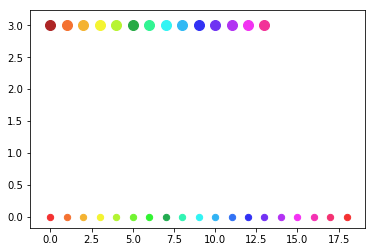

In [239]:
base_color = matplotlib.colors.hex2color("0xf47231".replace("0x", "#"))
colors = [shiftHueSatV(base_color, hue=-20+x, V=-0.3*(i==7)) for i, x in enumerate(np.linspace(0, 360, 19))]
#colors = [matplotlib.colors.rgb2hex(c).replace("#", "0x") for x in c]

for i, c in enumerate(colors):
    plt.scatter(i, 0, s=40, c=c)

alt_colors = ["0xad2525", "0xf47231", "0xf4b331", "0xf4f431", "0xb7f431", "0x26aa45", "0x31f492", "0x31f4f4", "0x31b9f4", "0x3131f4", "0x6f33f2", "0xb133f2", "0xf233f2", "0xf23398"]
alt_colors = [matplotlib.colors.hex2color(c.replace("0x", "#")) for c in alt_colors]

for i, c in enumerate(alt_colors):
    plt.scatter(i, 3, s=100, c=c)
